저장된 모델 로드

In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
model = tf.keras.models.load_model('drive/MyDrive/tensorflow/practice/fashionModel')

In [3]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 7, 128)        

In [34]:
img = tf.keras.preprocessing.image.load_img('drive/MyDrive/tensorflow/practice/shirt.jpg', grayscale=True)
img = tf.keras.preprocessing.image.img_to_array(img)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [35]:
img.shape

(280, 280, 1)

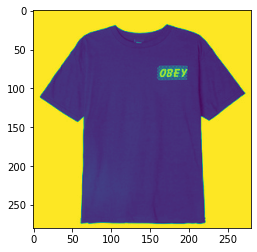

In [37]:
img = img.squeeze()
plt.imshow(img)
plt.show()

In [39]:
img = np.expand_dims(img, -1)
img = tf.keras.preprocessing.image.smart_resize(img, (28, 28))

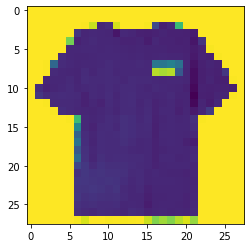

In [40]:
img = img.squeeze()
plt.imshow(img, interpolation='nearest')
plt.show()

In [41]:
img = np.expand_dims(img, -1)
img = np.expand_dims(img, 0)

In [42]:
img.shape

(1, 28, 28, 1)

In [43]:
result = model.predict(img)
print(np.argmax(result))

1


모델을 onnx 포맷으로 변환

In [44]:
!pip install tf2onnx

     |████████████████████████████████| 307kB 5.6MB/s 
     |████████████████████████████████| 7.7MB 7.1MB/s 


In [45]:
!python -m tf2onnx.convert --saved-model drive/MyDrive/tensorflow/practice/fashionModel --output drive/MyDrive/tensorflow/practice/ffmodel.onnx

2021-01-29 07:25:11.818748: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-01-29 07:25:13,542 - WARNING - '--tag' not specified for saved_model. Using --tag serve
2021-01-29 07:25:13.577840: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-01-29 07:25:13.579075: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-01-29 07:25:13.581842: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-01-29 07:25:13.582733: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemor